<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/GW_detector_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando Bibliotecas

In [2]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.9 MB/s eta 0:00:00


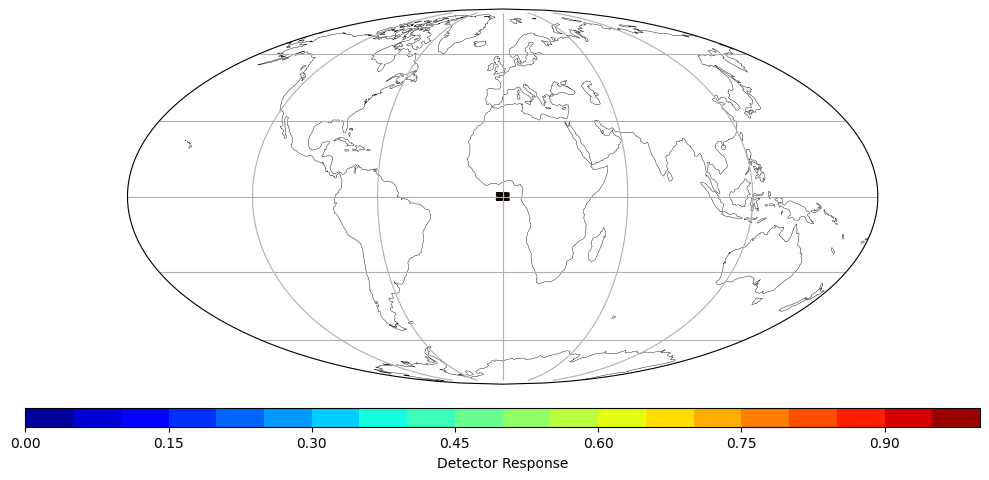

In [29]:
#!/usr/bin/env python
# coding: utf-8

# ## Exercise 11
# ![image-4.png](attachment:image-4.png)
#
# beta_0 - azimutal angle no ref geocentrico\
#  alpha_0 - polar angle no ref geocentrico\
#  phi_a - longitude\
#  theta - latitude\
#  xi_a - Detector orientation\
#  OMEGA - angulo entre os bracos do interferometro, aqui assumeremos interferometros L-shaped
#
#  ##### Equacoes fundamentais
#
# ![image.png](attachment:image.png)
#
# ![image-2.png](attachment:image-2.png)
#
# ![image-3.png](attachment:image-3.png)
#

# In[ ]:


import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as cp


# In[25]:


# Definindo a latitude e a longitude do LIGO-Livingston (infos do enunciado)
lon_d = -90.8
lat_d = 30.6
orientation_d = -18  # Orientação W18°S

# Conversao de unidades
phi_a = np.deg2rad(lon_d)
theta_a = np.deg2rad(90 - lat_d)
xi_a = np.deg2rad(orientation_d)

# Criando uma grade de latitudes e longitudes
lons = np.linspace(-180, 180, 360)
lats = np.linspace(-90, 90, 180)
lons, lats = np.meshgrid(lons, lats)

# Valores de exemplo para os ângulos no referencial geocêntrico
beta_0 = np.radians(lats)  # polar angle da fonte no referencial geocentrico
alpha_0 = np.radians(lons)  # azimutal angle da fonte no referencial geocentrico

# Sky position transformation
def calculate_U(beta_0, alpha_0, phi_a):
    return np.sin(beta_0) * np.sin(alpha_0 - phi_a)

def calculate_V(beta_0, theta_a, alpha_0, phi_a):
    return np.sin(beta_0) * np.cos(theta_a) * np.cos(alpha_0 - phi_a) - np.cos(beta_0) * np.sin(theta_a)

def calculate_X(theta_a, beta_0, alpha_0, phi_a):
    return np.cos(theta_a) * np.cos(beta_0) + np.sin(theta_a) * np.sin(beta_0) * np.cos(alpha_0 - phi_a)

def calculate_alpha_a(xi_a, U, V):
    return np.arctan((np.cos(xi_a) * U - np.sin(xi_a) * V) / (np.sin(xi_a) * U + np.cos(xi_a) * V))

def calculate_beta_a(X):
    return np.arctan(np.sqrt(1 - X**2) / X)

# beta_0 - azimutal angle no ref geocentrico
# alpha_0 - polar angle no ref geocentrico
# phi_a - longitude
# theta - latitude
# xi_a - Detector orientation


# Função para calcular a resposta do detector
def detector_response(beta_0, alpha_0, phi_a, theta_a, xi_a):
    U = calculate_U(beta_0, alpha_0, phi_a)
    V = calculate_V(beta_0, theta_a, alpha_0, phi_a)
    X = calculate_X(theta_a, beta_0, alpha_0, phi_a)

    alpha_a = calculate_alpha_a(xi_a, U, V)
    beta_a = calculate_beta_a(X)

    # Cálculo de f_+ e f_x
    f_plus = 0.5 * (1 + np.cos(beta_a)**2) * np.cos(2 * alpha_a)
    f_cross = -np.cos(beta_a) * np.sin(2 * alpha_a)

    return np.sqrt(f_plus**2 + f_cross**2)

    # Cálculo da resposta total do detector
F = detector_response(beta_0, alpha_0, phi_a, theta_a, xi_a)

# Calculando a resposta do detector em toda a grade de latitudes e longitudes
F = detector_response(beta_0, alpha_0, phi_a, theta_a, xi_a)

# Criando o gráfico com a biblioteca Cartopy
# Criando o gráfico com projeção Mollweide
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=cp.Mollweide())
contour = ax.contourf(np.radians(lons), np.radians(lats), F, levels=20, cmap='jet', transform=cp.PlateCarree())
ax.contour(np.radians(lons), np.radians(lats), F, levels=20, colors='k', linewidths=0.5, transform=cp.PlateCarree())
ax.set_global()  # Usado para ver todo o globo
ax.gridlines()  # Para plotar as linhas de latitude e longitude
ax.coastlines(lw=0.3)  # Para plotar os contornos dos continentes

# Adicionando a barra de cores
cbar = fig.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Detector Response')

plt.tight_layout()
plt.show()


# In[31]:

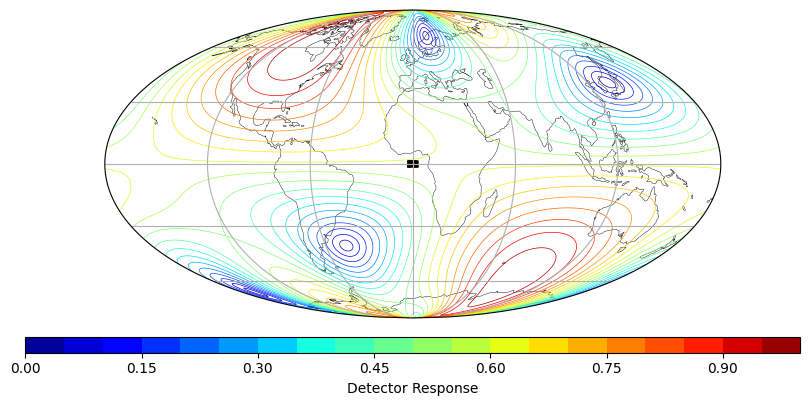

In [28]:



import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  # Corrigindo a importação de Cartopy

# Definindo a latitude e a longitude do LIGO-Livingston (infos do enunciado)
lon_d = -90.8
lat_d = 30.6
orientation_d = -18  # Orientação W18°S

# Conversao de unidades
phi_a = np.deg2rad(lon_d)
theta_a = np.deg2rad(90 - lat_d)
xi_a = np.deg2rad(orientation_d)

# Criando uma grade de latitudes e longitudes
lons = np.linspace(-180, 180, 360)
lats = np.linspace(-90, 90, 180)
lons, lats = np.meshgrid(lons, lats)

# Valores de exemplo para os ângulos no referencial geocêntrico
beta_0 = np.radians(lats)  # polar angle da fonte no referencial geocentrico
alpha_0 = np.radians(lons)  # azimutal angle da fonte no referencial geocentrico

# Sky position transformation
def calculate_U(beta_0, alpha_0, phi_a):
    return np.sin(beta_0) * np.sin(alpha_0 - phi_a)

def calculate_V(beta_0, theta_a, alpha_0, phi_a):
    return np.sin(beta_0) * np.cos(theta_a) * np.cos(alpha_0 - phi_a) - np.cos(beta_0) * np.sin(theta_a)

def calculate_X(theta_a, beta_0, alpha_0, phi_a):
    return np.cos(theta_a) * np.cos(beta_0) + np.sin(theta_a) * np.sin(beta_0) * np.cos(alpha_0 - phi_a)

def calculate_alpha_a(xi_a, U, V):
    return np.arctan((np.cos(xi_a) * U - np.sin(xi_a) * V) / (np.sin(xi_a) * U + np.cos(xi_a) * V))

def calculate_beta_a(X):
    return np.arctan(np.sqrt(1 - X**2) / X)

# Função para calcular a resposta do detector
def detector_response(beta_0, alpha_0, phi_a, theta_a, xi_a):
    U = calculate_U(beta_0, alpha_0, phi_a)
    V = calculate_V(beta_0, theta_a, alpha_0, phi_a)
    X = calculate_X(theta_a, beta_0, alpha_0, phi_a)

    alpha_a = calculate_alpha_a(xi_a, U, V)
    beta_a = calculate_beta_a(X)

    # Cálculo de f_+ e f_x
    f_plus = 0.5 * (1 + np.cos(beta_a)**2) * np.cos(2 * alpha_a)
    f_cross = -np.cos(beta_a) * np.sin(2 * alpha_a)

    return np.sqrt(f_plus**2 + f_cross**2)

# Calculando a resposta do detector em toda a grade de latitudes e longitudes
F = detector_response(beta_0, alpha_0, phi_a, theta_a, xi_a)

# Criando o gráfico com a biblioteca Cartopy
# Criando o gráfico com projeção Mollweide
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Mollweide())
contour = ax.contourf(np.radians(lons), np.radians(lats), F, levels=20, cmap='jet', transform=ccrs.PlateCarree())
ax.contour(np.radians(lons), np.radians(lats), F, levels=20, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
ax.contour(lons, lats, F, levels=20, cmap='jet', linewidths=0.5, transform=ccrs.PlateCarree())
ax.set_global()  # Usado para ver todo o globo
ax.gridlines()  # Para plotar as linhas de latitude e longitude
ax.coastlines(lw=0.3)  # Para plotar os contornos dos continentes

# Adicionando a barra de cores
cbar = fig.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Detector Response')

plt.show()

# Exemplo com mapa da cores solidas mas com outros dados

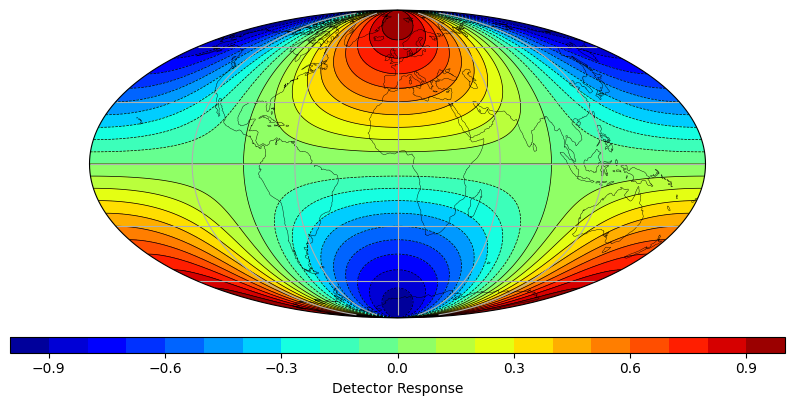

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

# Exemplo de dados fictícios
lons = np.linspace(-180, 180, 360)
lats = np.linspace(-90, 90, 180)
lons, lats = np.meshgrid(lons, lats)
F = np.sin(np.radians(lats)) * np.cos(np.radians(lons))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Mollweide())

contour = ax.contourf(lons, lats, F, levels=20, cmap='jet', transform=ccrs.PlateCarree())
ax.contour(lons, lats, F, levels=20, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
ax.set_global()  # Usado para ver todo o globo
ax.gridlines()  # Para plotar as linhas de latitude e longitude
ax.coastlines(lw=0.3)  # Para plotar os contornos dos continentes

# Adicionando a barra de cores
cbar = fig.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Detector Response')

plt.show()


# Usando o Helpy

In [2]:
!pip install healpy

In [33]:
# description = "holds things relating to antenna patterns"
# author      = "reed.essick@ligo.org"

#-------------------------------------------------

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

#-------------------------------------------------

def antenna_patterns(theta, phi, psi, nx, ny, freqs=None, dt=0.0, dr=None):
    """
    computes the antenna patterns for detector arms oriented along nx and ny (cartesian vectors).
        if freqs, it computes time-shift phases in the frequency domain using dt.
        if dr and freq, it will compute dt for itself (save time with cos(theta), etc.

    Antenna patterns are computed accoring to Eqn. B7 from Anderson, et all PhysRevD 63(04) 2003
    """
    if isinstance(theta, (int, float)):
        n_pix = 1
    else:
        n_pix = len(theta)

    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_phi = np.cos(phi)
    sin_phi = np.sin(phi)
    cos_psi = np.cos(psi)
    sin_psi = np.sin(psi)

    Xx = sin_phi*cos_psi - sin_psi*cos_phi*cos_theta
    Xy = -cos_phi*cos_psi - sin_psi*sin_phi*cos_theta
    Xz = sin_psi*sin_theta

    Yx = -sin_phi*sin_psi - cos_psi*cos_phi*cos_theta
    Yy = cos_phi*sin_psi - cos_psi*sin_phi*cos_theta
    Yz = sin_theta*cos_psi

    X = (Xx, Xy, Xz)
    Y = (Yx, Yy, Yz)

    ### iterate over x,y,z to compute F+ and Fx
    Fp = np.zeros((n_pix,),float)
    Fx = np.zeros((n_pix,),float)

    for i in range(3):
        nx_i = nx[i]
        ny_i = ny[i]
        Xi = X[i]
        Yi = Y[i]
        for j in range(3):
            Xj = X[j]
            Yj = Y[j]
            Dij = 0.5*(nx_i*nx[j] - ny_i*ny[j])
            Fp += (Xi*Xj - Yi*Yj)*Dij
            Fx += (Xi*Yj + Yi*Xj)*Dij

    ### apply time-shits
    if freqs != None:
        freqs = np.array(freqs)
        n_freqs = len(freqs)
        if dr != None:
            dx, dy, dz = dr
            dt = dx*sin_theta*cos_phi + dy*sin_theta*sin_phi + dz*cos_theta
            phs = 2*np.pi*np.outer(dt,freqs)
            phs = np.cos(phs) - 1j*np.sin(phs)
        else:
            phs = np.ones((n_pix,n_freqs),float)

        ones_freqs = np.ones((n_freqs),float)
        Fp = np.outer(Fp, ones_freqs) * phs
        Fx = np.outer(Fx, ones_freqs) * phs

    if n_pix == 1:
        return Fp[0], Fx[0]
    else:
        return Fp, Fx

In [5]:
!pip install Basemap

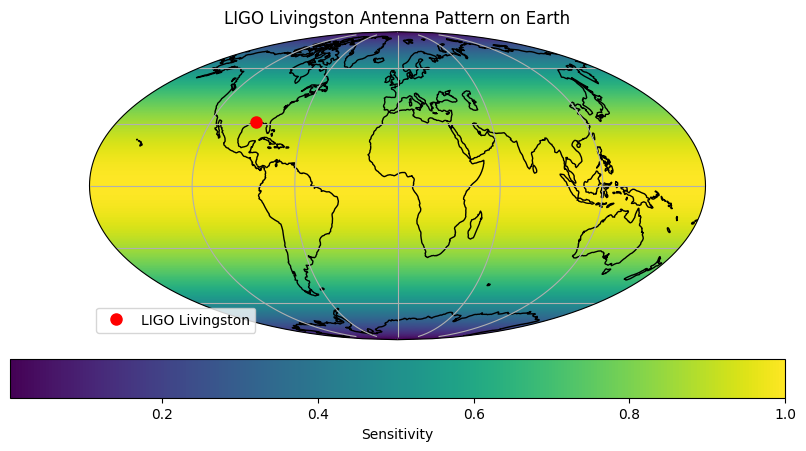

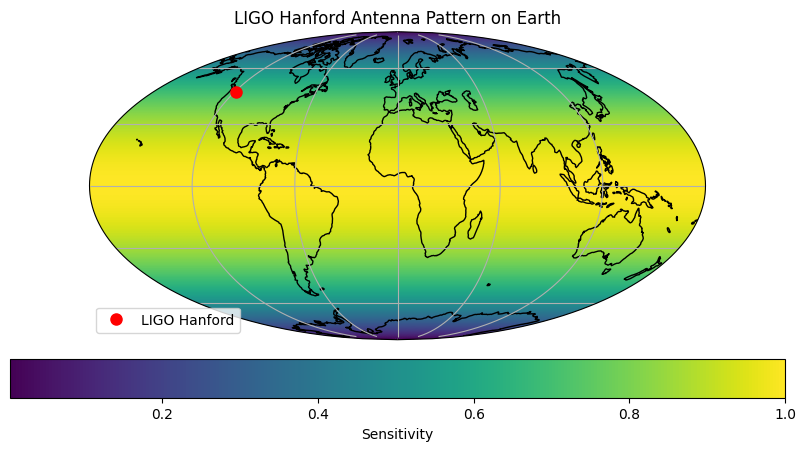

In [6]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def antenna_patterns(theta, phi, psi, nx, ny):
    # Aqui você deve implementar a função que calcula os padrões da antena (Fp e Fx)
    # No exemplo abaixo, apenas valores fictícios são retornados
    Fp = np.sin(theta) * np.cos(phi)
    Fx = np.sin(theta) * np.sin(phi)
    return Fp, Fx

def plot_antenna_pattern_earth(nx, ny, title, observatory_lat, observatory_lon, observatory_name):
    nside = 200
    npix = hp.nside2npix(nside)
    theta, phi = hp.pix2ang(nside, np.arange(npix))
    psi = np.zeros(npix)  # Assuming psi = 0 for simplicity

    Fp, Fx = antenna_patterns(theta, phi, psi, nx, ny)
    sensitivity = np.sqrt(Fp**2 + Fx**2)

    # Convert theta, phi to latitude and longitude
    lat = 90 - np.degrees(theta)
    lon = np.degrees(phi)

    # Create a Cartopy instance for Mollweide projection
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.Mollweide()})
    ax.coastlines()
    ax.gridlines()

    # Plot the sensitivity data
    sc = ax.scatter(lon, lat, c=sensitivity, cmap='viridis', s=1, edgecolor='none', transform=ccrs.PlateCarree())
    plt.colorbar(sc, orientation='horizontal', pad=0.05, label='Sensitivity')

    # Highlight the location of the observatory
    ax.plot(observatory_lon, observatory_lat, 'ro', markersize=8, transform=ccrs.PlateCarree(), label=observatory_name)

    plt.legend(loc='lower left')
    plt.title(title)
    plt.show()

# LIGO Livingston (LL) orientations
LL_nx = [-0.9546, -0.1416, -0.2622]
LL_ny = [0.2977, -0.4879, -0.8205]
LL_lat, LL_lon = 30.5623, -90.7740  # LIGO Livingston coordinates

# LIGO Hanford (LH) orientations
LH_nx = [-0.2239, 0.7998, 0.5569]
LH_ny = [-0.9140, 0.0261, -0.4049]
LH_lat, LH_lon = 46.4551, -119.4075  # LIGO Hanford coordinates

# Plotting the antenna patterns on Earth Mollweide projection
plot_antenna_pattern_earth(LL_nx, LL_ny, "LIGO Livingston Antenna Pattern on Earth", LL_lat, LL_lon, "LIGO Livingston")
plot_antenna_pattern_earth(LH_nx, LH_ny, "LIGO Hanford Antenna Pattern on Earth", LH_lat, LH_lon, "LIGO Hanford")
